In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()

# Generate the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())
print(df.info())

# Converted to a binary classification problem 
df['target'] = df['target'].replace({2: 1})
print(df.tail())

# Split into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float

AUC for training set: 1.000
AUC for testing set: 1.000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


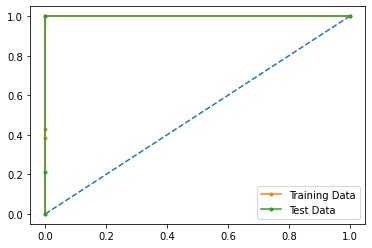

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none', verbose=True, class_weight='balanced')
model.fit(X_train, y_train)

# Prediction
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Probability Prediction
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

auc_train = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
auc_test = metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print('AUC for training set: %.3f' % auc_train)
print('AUC for testing set: %.3f' % auc_test)

# ROC curve
fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, marker='.', label = 'Training Data')
plt.plot(fpr_test, tpr_test, marker='.', label = 'Test Data')
plt.legend(loc=0)
plt.show()